## Exercise 4: Correlations and preprocessing

Before we start applying machine learning algorithms, we want to have a look at further preprocessing and analyzing steps. To do so, this exercise will mainly deal with scaling, dimensionality reduction, correlation measures and the distribution of data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import math
import statistics 

In [2]:
# df = pd.read_csv('data/players_20.csv')#Change path according to your files
csv = pd.read_csv('data/fifa_20.csv')#Assuming fifa_20 and players_20.csv are same file

df = csv.copy(deep=False)
df = df[['short_name','goalkeeping_handling', 'goalkeeping_positioning', 'height_cm', 'gk_speed', 'defending']]

newDf = df[(df['gk_speed'].notna())]

newDf.tail()



,short_name,goalkeeping_handling,goalkeeping_positioning,height_cm,gk_speed,defending
18231,P. Królczyk,47,48,188,18.0,NaN
18239,V. Storsve,50,49,185,30.0,NaN
18251,G. Sykes-Kenworthy,46,48,182,32.0,NaN
18259,H. Sveijer,49,47,185,24.0,NaN
18272,P. Martin,51,43,188,24.0,NaN


### correlation vs. causality

A common step in data analytics is to investigate correlations between variables. Sometimes these correlations might or might not be derivable from obvious causalities. Create scatter plots of the feature pair 'goalkeeping_handling' and 'goalkeeping_positioning' and the feature pair 'height_cm' and 'gk_speed'. Do not forget to name the axes of the plots and add suitable titles.

In addition, calculate and print the Pearson correlation of each feature pair (you can also add the correlation to the title of the plot for a better overview). For calculation, use for example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

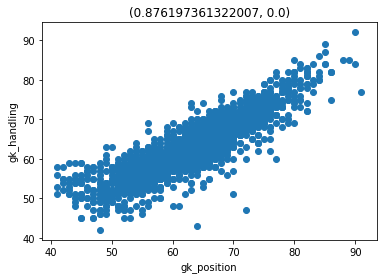

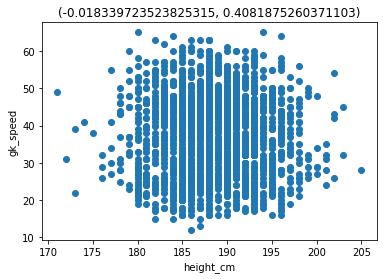

In [4]:
#TODO: Make scatter plots, calculate the Pearson correlation, think about it.
xAxis1 = newDf[['goalkeeping_positioning']] 
yAxis1 = newDf[['goalkeeping_handling']]
xAxis1Label = 'gk_position'
yAxis1Label = 'gk_handling'
title1 = pearsonr(newDf['goalkeeping_handling'] , newDf['goalkeeping_positioning'])

xAxis2 = newDf[['height_cm']]
yAxis2 = newDf[['gk_speed']]
xAxis2Label = 'height_cm'
yAxis2Label = 'gk_speed'
title2 = pearsonr(newDf['height_cm'] , newDf['gk_speed'])


plt.scatter(xAxis1, yAxis1)
plt.title(title1)
plt.xlabel(xAxis1Label)
plt.ylabel(yAxis1Label)
plt.show()

plt.scatter(xAxis2, yAxis2)
plt.title(title2)
plt.xlabel(xAxis2Label)
plt.ylabel(yAxis2Label)
plt.show()



### investigate distributions

Create a histogram of the feature *defending* using 75 bins and the parameter *normed = True*. In addition, plot a normal distribution with the same mean and variance as line plot into the same diagram (it is recommended to use different colors).
For plotting the normal distribution you can use:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html

https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

What do you observe?

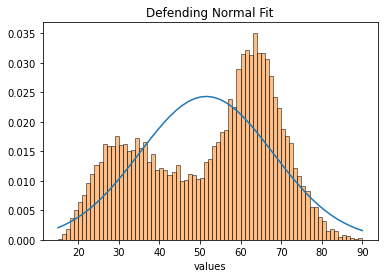

In [107]:
#TODO: Compute mean and standard deviation, plot both charts in one diagram, what can you see?

defending = df['defending']
defendMin = defending.min()
defendMax = defending.max()

#mean and stdDeviation
mean = defending.mean()
stdDev = defending.std()


#note
# According to matplotlib version 3.0.2,

# normed : bool, optional Deprecated; So I am using density parameter

#plotting
domain = np.linspace(defendMin, defendMax)
plt.plot(domain, norm.pdf(domain, mean, stdDev) )
plt.hist(defending, bins=75, edgecolor = 'black', alpha = .5, density = True)
plt.title('Defending Normal Fit')
plt.xlabel('values')
plt.show()